# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Lecture 8 </span>

##  <span style="color:blue"> Exercise 8.1

Computation and minimization of the expectation value 

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

where

$$
V(x) = x^4 - \frac{5}{2}x^2
$$

$$
\Psi_T^{\sigma,\mu}(x) = e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}} := e_- + e_+
$$

Normalization is not necessary for Metropolis algorithm, but in case divide by $2\sqrt\pi\sigma \left ( 1+e^{-\frac{\mu^2}{\sigma^2}} \right )$.

Needed are

$$
|\Psi_T(x)|^2 = e^{-\frac{(x-\mu)^2}{\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{\sigma^2}}+2e^{-\frac{x^2+\mu^2}{\sigma^2}}
$$

$$
\frac{{\hat H} \Psi_T(x)}{\Psi_T(x)} = \frac{e_-\left[ \frac{1}{2\sigma^2}(1-\frac{(x-\mu)^2}{\sigma^2})+x^4+\frac{5}{2}x^2\right ] + e_+\left[ \frac{1}{2\sigma^2}(1-\frac{(x+\mu)^2}{\sigma^2})+x^4+\frac{5}{2}x^2\right ]}{e_- + e_+}
$$

Procedure:
* the included C++ code computes the expected value for given $\sigma$, $\mu$ (read from input.dat), after properly tuning the Metropolis step for 50% acceptance
* a bash script *parameters.sh* cycles over $\sigma, \mu$ = 0.5 to 1 to create a mesh in the parameter space ("phase space") ($\sigma, \mu$)
* finally, a Python script *mimimum.py* evaluates the minimum of $E_0$ and the corresponding $\sigma_{min}, \mu_{min}$.

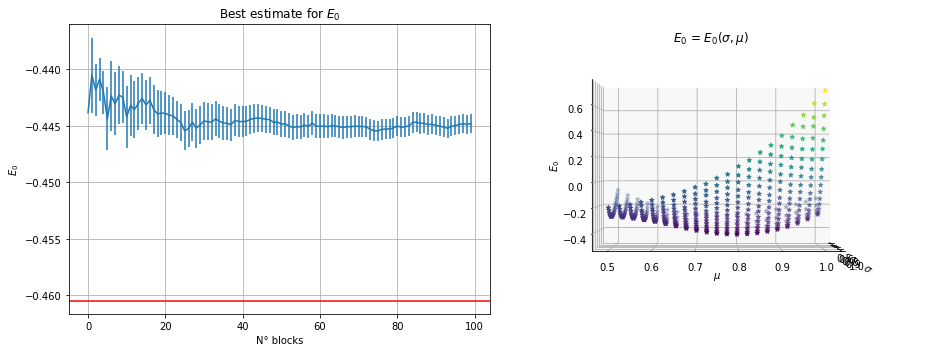

In [152]:
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec

N = 100
M = 1000000
sum_prog = np.zeros(N)
err_prog = np.zeros(N)
steps = np.arange(N)

file1 = open("./LSN_08.1/output_sigma_mi")
line1 = file1.readlines()
for i in range(N):
    data1 = line1[i].split("   ")
    #steps[i] = data1[0]
    sum_prog[i] = data1[1]
    err_prog[i] = data1[2]    
file1.close()

#Plot E0 landscape

K=441

sigma = np.zeros(K)
mi = np.zeros(K)
e_zero = np.zeros(K)

file3 = open("./LSN_08.1/E0_sigma_mi")
line3 = file3.readlines()
for i in range(K):
    data3 = line3[i].split("   ")
    sigma[i] = data3[0]
    mi[i] = data3[1]
    e_zero[i] = data3[2]
file3.close()

file4 = open("./LSN_08.1/E0_sigma_mi")
line4 = file4.readlines()
for i in range(K):
    data3 = line3[i].split("   ")
    sigma[i] = data3[0]
    mi[i] = data3[1]
    e_zero[i] = data3[2]
file3.close()
    
fig = plt.figure(figsize=(13,5))
gs = gridspec.GridSpec(1,2,width_ratios=[2,1])

plt.subplot(1,2,1)
plt.errorbar(steps, sum_prog, yerr = err_prog)
plt.xlabel("N° blocks")
plt.ylabel("$E_0$")
plt.grid(True)
plt.title(("Best estimate for $E_0$"))
plt.axhline(-0.46046587969271535,color='r')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(sigma, mi, e_zero, c=e_zero, marker='*')
ax.set_xlabel('$\sigma$')
ax.set_ylabel('$\mu$')
ax.set_zlabel('$E_0$')
ax.set_title('$E_0$ = $E_0(\sigma,\mu)$')
ax.view_init(0, 0)

plt.tight_layout()
plt.show()

The parameters which minimize $\Psi_T^{\sigma,\mu}(x)$, according to the above (rough) sampling of the parameter space, are

$$
\sigma = 0.625
$$
$$
\mu = 0.8
$$

This means that the peaks of the ground state wfc do not exactly match the potential wells, $|x|=1$, but are rather located more inwards. 
They get narrower with decreasing $\sigma$, but extreme localization is prevented by indetermination.

A sketch of the energy landscape in parameter space is given in the top right panel (feel free to play with the angles in *ax.view_init* at will, it runs in a second!).

##  <span style="color:blue"> Exercise 8.2

Minimization of $\langle {\hat H} \rangle_T$ via simulated annealing in the phase space ($\sigma, \mu$).
Or rather, in its subset $\sigma,\mu \in [0,10]$ (we already know a good estimate for the solution from exercise above...).

This requires, once and for all, the computation of 

$$
\langle {\hat H} \rangle_T = L(\sigma,\mu) = \frac{1}{4\sigma^4 \varphi_{\sigma\mu}}\left [ 3\varphi_{\sigma\mu}\sigma^8 + (12\mu^2-5\varphi_{\sigma\mu})\sigma^6 + 2\mu^2(2\mu^2-5)\sigma^4 + \varphi_{\sigma\mu}\sigma^2 -2\mu^2e^{-\frac{\mu^2}{\sigma^2}} \right ]
$$

$$
\varphi_{\sigma\mu}:=1+e^{-\frac{\mu^2}{\sigma^2}}
$$

to be used as fictitious Hamiltonian in the Boltzmann PDF (note that $L$ only depends on even powers of $\sigma$ and $\mu$, as is correct; nonetheless, to avoid unphysical values, the phase space has been restricted to a subset of quadrant 1).

The starting temperature is set to $T_0 = 10 K$, then progressively decreased as $T_{i} = \frac{T_0}{i}$, i = 1.. 10$^5$ (the step is variable, tuned on the run) via bash script *anneal.sh*.

For every T, the Metropolis algorithm runs for M = 10$^6$ steps and the instantaneous measures of the fictitious energy $L$ are grouped into 100 blocks. 


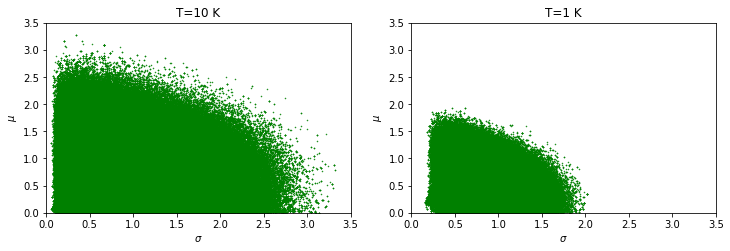

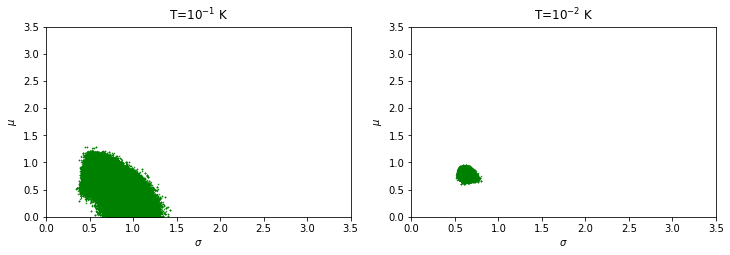

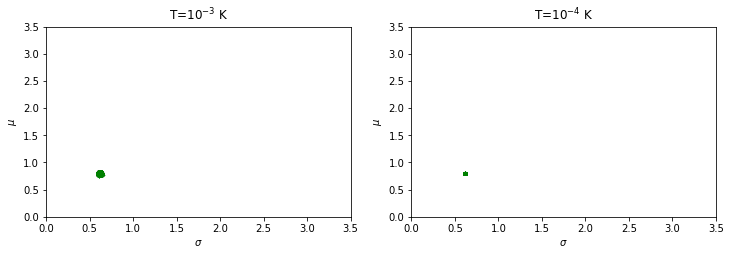

In [186]:
import matplotlib.pyplot as plt

M = 1000000

Sigma = np.zeros(M)
Mi = np.zeros(M)
Sigma2 = np.zeros(M)
Mi2 = np.zeros(M)

file = open("./LSN_08.2/points_iter1")
line = file.readlines()
for i in range(M):
    data = line[i].split("   ")
    Sigma[i] = data[0]
    Mi[i] = data[1]
file.close()

file2 = open("./LSN_08.2/points_iter10")
line = file2.readlines()
for i in range(M):
    data = line[i].split("   ")
    Sigma2[i] = data[0]
    Mi2[i] = data[1]
file2.close()

fig = plt.figure(figsize=(12,3.5))

plt.subplot(1,2,1)
plt.scatter(Sigma, Mi, c ="green", marker='.', s=1)
plt.xlabel("$\sigma$")
plt.ylabel("$\mu$")
plt.xlim(0,3.5)
plt.ylim(0,3.5)
plt.title("T=10 K")

plt.subplot(1,2,2)
plt.scatter(Sigma2, Mi2, c ="green", marker='.', s=1)
plt.xlabel("$\sigma$")
plt.ylabel("$\mu$")
plt.xlim(0,3.5)
plt.ylim(0,3.5)
plt.title("T=1 K")

file = open("./LSN_08.2/points_iter100")
line = file.readlines()
for i in range(M):
    data = line[i].split("   ")
    Sigma[i] = data[0]
    Mi[i] = data[1]
file.close()

file2 = open("./LSN_08.2/points_iter1000")
line = file2.readlines()
for i in range(M):
    data = line[i].split("   ")
    Sigma2[i] = data[0]
    Mi2[i] = data[1]
file2.close()

fig = plt.figure(figsize=(12,3.5))

plt.subplot(1,2,1)
plt.scatter(Sigma, Mi, c ="green", marker='.', s=1)
plt.xlabel("$\sigma$")
plt.ylabel("$\mu$")
plt.xlim(0,3.5)
plt.ylim(0,3.5)
plt.title("T=10$^{-1}$ K")

plt.subplot(1,2,2)
plt.scatter(Sigma2, Mi2, c ="green", marker='.', s=1)
plt.xlabel("$\sigma$")
plt.ylabel("$\mu$")
plt.xlim(0,3.5)
plt.ylim(0,3.5)
plt.title("T=10$^{-2}$ K")

file = open("./LSN_08.2/points_iter10000")
line = file.readlines()
for i in range(M):
    data = line[i].split("   ")
    Sigma[i] = data[0]
    Mi[i] = data[1]
file.close()

file2 = open("./LSN_08.2/points_iter100000")
line = file2.readlines()
for i in range(M):
    data = line[i].split("   ")
    Sigma2[i] = data[0]
    Mi2[i] = data[1]
file2.close()

fig = plt.figure(figsize=(12,3.5))

plt.subplot(1,2,1)
plt.scatter(Sigma, Mi, c ="green", marker='.', s=1)
plt.xlabel("$\sigma$")
plt.ylabel("$\mu$")
plt.xlim(0,3.5)
plt.ylim(0,3.5)
plt.title("T=10$^{-3}$ K")

plt.subplot(1,2,2)
plt.scatter(Sigma2, Mi2, c ="green", marker='.', s=1)
plt.xlabel("$\sigma$")
plt.ylabel("$\mu$")
plt.xlim(0,3.5)
plt.ylim(0,3.5)
plt.title("T=10$^{-4}$ K")

plt.show()

The graphs above show the scatterplot of the points $(\sigma,\mu)$ visited by the Metropolis walker, for i=10$^k$, k=0...5 (the last plot corresponds then to T = 10$^{-4}$ K). The sampled region progressively reduces and the algorithm correctly ends up in the already known minimum, without getting trapped in local minima.

The graphs below show the blocking average of $E_0 = L$ for the same set of temperatures. As T is lowered, the predicted value for $E_0$ gradually approaches the result we had obtained in the exercise before.

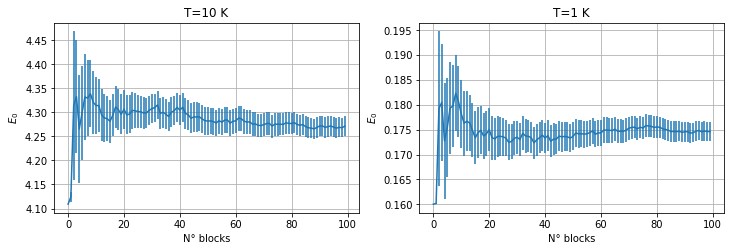

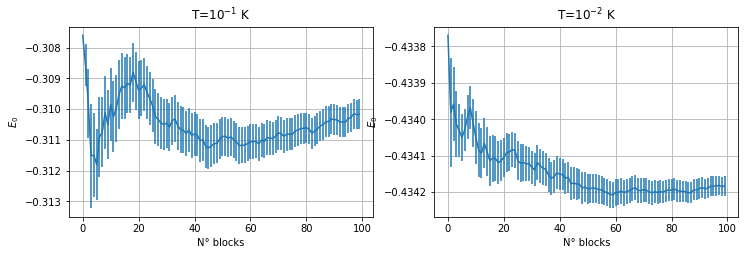

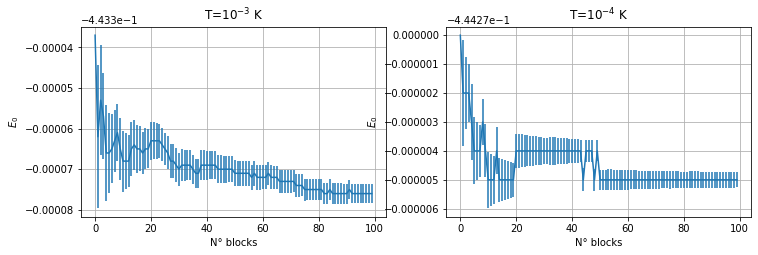

In [185]:
import matplotlib.pyplot as plt

M = 100

x = np.arange(M)
sum_prog = np.zeros(M)
err_prog = np.zeros(M)
sum_prog2 = np.zeros(M)
err_prog2 = np.zeros(M)

file = open("./LSN_08.2/output.epot_iter1")
line = file.readlines()
for i in range(M):
    data = line[i].split(" ")
    sum_prog[i] = data[2]
    err_prog[i] = data[3]
file.close()

file2 = open("./LSN_08.2/output.epot_iter10")
line = file2.readlines()
for i in range(M):
    data = line[i].split(" ")
    sum_prog2[i] = data[2]
    err_prog2[i] = data[3]
file2.close()

fig = plt.figure(figsize=(12,3.5))

plt.subplot(1,2,1)
plt.errorbar(x, sum_prog, yerr = err_prog)
plt.xlabel("N° blocks")
plt.ylabel("$E_0$")
plt.grid(True)
plt.title("T=10 K")

plt.subplot(1,2,2)
plt.errorbar(x, sum_prog2, yerr = err_prog2)
plt.xlabel("N° blocks")
plt.ylabel("$E_0$")
plt.grid(True)
plt.title("T=1 K")

file = open("./LSN_08.2/output.epot_iter100")
line = file.readlines()
for i in range(M):
    data = line[i].split(" ")
    sum_prog[i] = data[2]
    err_prog[i] = data[3]
file.close()

file2 = open("./LSN_08.2/output.epot_iter1000")
line = file2.readlines()
for i in range(M):
    data = line[i].split(" ")
    sum_prog2[i] = data[2]
    err_prog2[i] = data[3]
file2.close()

fig = plt.figure(figsize=(12,3.5))

plt.subplot(1,2,1)
plt.errorbar(x, sum_prog, yerr = err_prog)
plt.xlabel("N° blocks")
plt.ylabel("$E_0$")
plt.grid(True)
plt.title("T=10$^{-1}$ K")

plt.subplot(1,2,2)
plt.errorbar(x, sum_prog2, yerr = err_prog2)
plt.xlabel("N° blocks")
plt.ylabel("$E_0$")
plt.grid(True)
plt.title("T=10$^{-2}$ K")

file = open("./LSN_08.2/output.epot_iter10000")
line = file.readlines()
for i in range(M):
    data = line[i].split(" ")
    sum_prog[i] = data[2]
    err_prog[i] = data[3]
file.close()

file2 = open("./LSN_08.2/output.epot_iter100000")
line = file2.readlines()
for i in range(M):
    data = line[i].split(" ")
    sum_prog2[i] = data[2]
    err_prog2[i] = data[3]
file2.close()

fig = plt.figure(figsize=(12,3.5))

plt.subplot(1,2,1)
plt.errorbar(x, sum_prog, yerr = err_prog)
plt.xlabel("N° blocks")
plt.ylabel("$E_0$")
plt.grid(True)
plt.title("T=10$^{-3}$ K")

plt.subplot(1,2,2)
plt.errorbar(x, sum_prog2, yerr = err_prog2)
plt.xlabel("N° blocks")
plt.ylabel("$E_0$")
plt.grid(True)
plt.title("T=10$^{-4}$ K")
plt.show()

At this point, we are able to get an estimate for $(\sigma_{min}, \mu_{min})$. To do so we consider the T=10$^{-4}$ K case, we divide the sampled phase space region into bins and see which one has the highest number of sampled points. Since doing so for the whole batch of sampled points, only the first 10000 points are considered. The estimate is

$$
\sigma = 0.615
$$
$$
\mu = 0.798
$$

(with precision on the last digit, introduced by the finiteness of the bin size).


Lastly, we get back to x-space and use these values for a final estimate of $E_0$, with the same code as in Exercise 8.1.

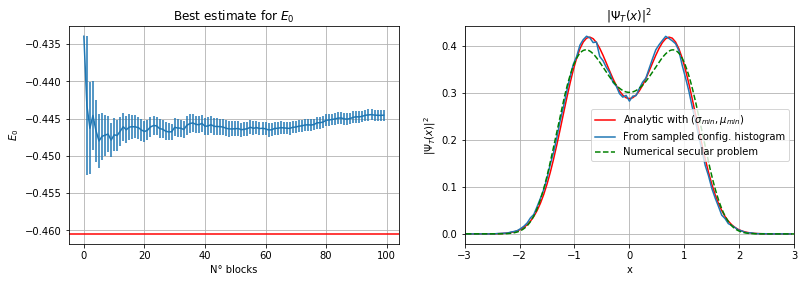

In [231]:
from scipy.integrate import simps
import math

def Vpot(x):
    return (x**2 - 2.5)*x**2

def ground_state(x,mi,sigma):
    return math.exp(-(x-mi)**2/(2*sigma**2))+math.exp(-(x+mi)**2/(2*sigma**2))

#################### NUMERICAL SOLUTION OF SECULAR PROBLEM

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
p = np.linspace(-a/2, a/2, N)
dp = p[1] - p[0] # the step size
V = Vpot(p)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2
CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
H = (-(hbar**2)*CDiff)/(2*m*dp**2) + np.diag(V)
E,psi = np.linalg.eigh(H)
psi = np.transpose(psi)
psi = psi/np.sqrt(dp)

#################### 

mi = 0.798
sigma = 0.615

nbins = 100
x = np.zeros(nbins)
pdf = np.zeros(nbins)

file=open("./LSN_08.2_bis/pdf.txt")
line=file.readlines()
for i in range(nbins):
    data=line[i].split()
    x[i]=data[0] 
    pdf[i]=data[1]
file.close()

I = simps(pdf,x)   #Normalization coefficient of the simulation: integral of pdf(x)dx in the range [-3,3)
for i in range(nbins):
    pdf[i]/=I

anal=np.array([ground_state(el,mu,sigma)**2 for el in x])

#I2=simps(anal,x)   #Normalization coefficient of the analytic function
I2 = 2*(np.pi**0.5)*sigma*(1+np.exp(-(mi/sigma)**2))
for i in range(nbins):
    anal[i]/=I2
    
N = 100
M = 1000000
sum_prog = np.zeros(N)
err_prog = np.zeros(N)
steps = np.arange(N)

file1 = open("./LSN_08.2_bis/output_sigma_mi")
line1 = file1.readlines()
for i in range(N):
    data1 = line1[i].split("   ")
    #steps[i] = data1[0]
    sum_prog[i] = data1[1]
    err_prog[i] = data1[2]    
file1.close()
 
fig = plt.figure(figsize=(13,4))
gs = gridspec.GridSpec(1,2,width_ratios=[2,1])

plt.subplot(1,2,1)
plt.errorbar(steps, sum_prog, yerr = err_prog)
plt.xlabel("N° blocks")
plt.ylabel("$E_0$")
plt.grid(True)
plt.title(("Best estimate for $E_0$"))
plt.axhline(-0.46046587969271535,color='r')

plt.subplot(1,2,2)
plt.plot(x, anal, color='r', label="Analytic with $(\sigma_{min}, \mu_{min})$")
plt.plot(x, pdf, label="From sampled config. histogram")
plt.plot(p,(psi[0])**2, color='green',linestyle='dashed', label='Numerical secular problem')
plt.xlabel("x")
plt.ylabel("$|\Psi_T (x)|^2$")
plt.grid(True)
plt.title("$|\Psi_T (x)|^2$")
plt.xlim((-3,3))
plt.legend()

plt.show()